### pip install -U scikit-fuzzy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Text(85, 0.4, 'H')

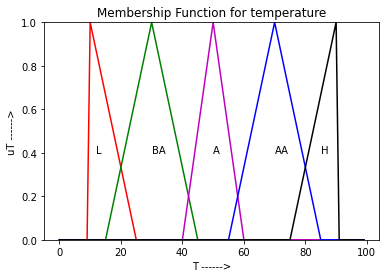

In [15]:
temp = np.arange(0,100,1)

L = fuzz.trimf(temp,[10, 10, 25])
BA = fuzz.trimf(temp,[15, 30, 45])
A = fuzz.trimf(temp,[40, 50, 60])
AA = fuzz.trimf(temp,[55, 70, 85])
H = fuzz.trimf(temp,[75, 90, 90])

fig,a=plt.subplots()
a.plot(temp, L, 'r', temp, BA, 'g', temp, A, 'm', temp, AA, 'b', temp, H, 'k')
plt.title('Membership Function for temperature')
a.set_ylabel('uT ------>')
a.set_xlabel('T ------>')
a.set_ylim(0,1)
plt.text(12,0.4,'L')
plt.text(30,0.4,'BA')
plt.text(50,0.4,'A')
plt.text(70,0.4,'AA')
plt.text(85,0.4,'H')

Text(4.7, 0.4, 'H')

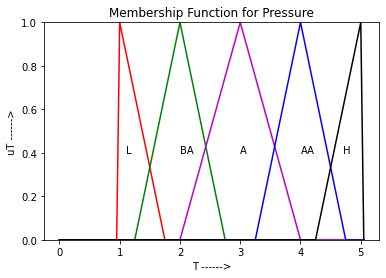

In [58]:
temp1 = np.arange(0,5.1,0.05)

L1 = fuzz.trimf(temp1,[1, 1, 1.75])
BA1 = fuzz.trimf(temp1,[1.25, 2, 2.75])
A1 = fuzz.trimf(temp1,[2, 3, 4])
AA1 = fuzz.trimf(temp1,[3.25, 4, 4.75])
H1 = fuzz.trimf(temp1,[4.25, 5, 5])

fig,a=plt.subplots()
a.plot(temp1, L1, 'r', temp1, BA1, 'g', temp1, A1, 'm', temp1, AA1, 'b', temp1, H1, 'k')
plt.title('Membership Function for Pressure')
a.set_ylabel('uT ------>')
a.set_xlabel('T ------>')
a.set_ylim(0,1)
plt.text(1.1,0.4,'L')
plt.text(2,0.4,'BA')
plt.text(3,0.4,'A')
plt.text(4,0.4,'AA')
plt.text(4.7,0.4,'H')

Text(4.7, 0.4, 'H')

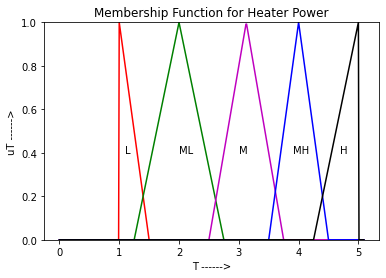

In [60]:
temp2 = np.arange(0,5.1,0.01)

L2 = fuzz.trimf(temp2,[1, 1, 1.5])
ML = fuzz.trimf(temp2,[1.25, 2, 2.75])
M = fuzz.trimf(temp2,[2.5, 3.125, 3.75])
MA = fuzz.trimf(temp2,[3.5, 4, 4.5])
H2 = fuzz.trimf(temp2,[4.25, 5, 5])

fig,a=plt.subplots()
a.plot(temp2, L2, 'r', temp2, ML, 'g', temp2, M, 'm', temp2, MA, 'b', temp2, H2, 'k')
plt.title('Membership Function for Heater Power')
a.set_ylabel('uT ------>')
a.set_xlabel('T ------>')
a.set_ylim(0,1)
plt.text(1.1,0.4,'L')
plt.text(2,0.4,'ML')
plt.text(3,0.4,'M')
plt.text(3.9,0.4,'MH')
plt.text(4.7,0.4,'H')

In [19]:
# given values is T=22.5 degree C and P = 1.5 atm
T = np.array([22.5])
P = np.array([1.5])
# now we have to find intersecting point for BA and the range is (15,30,45) and (1.25,2,2.75)
y1 = fuzz.trimf(T,[15, 30, 45])
y2 = fuzz.trimf(P,[1.25, 2, 2.75])
print(y1)
print(y2)

[0.5]
[0.33333333]


In [20]:
# now we have to find minimum of y1 and y2
min1 = min(y1,y2)
print(min1)

[0.33333333]


### Rule 1

In [21]:
t1 = np.fmin(min1,MA)

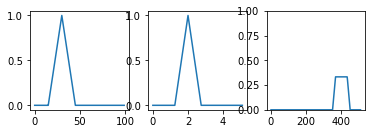

In [22]:
plt.subplot(2,3,1)
plt.plot(temp,BA)
plt.subplot(2,3,2)
plt.plot(temp1,BA1)
plt.subplot(2,3,3)
plt.ylim(0,1)
plt.plot(t1)

### Rule 2

In [23]:
# given values is T=22.5 degree C and P = 1.5 atm
T = np.array([22.5])
P = np.array([1.5])
# now we have to find intersecting point for BA and the range is (10,10,25) and (1,1,1.5)
y11 = fuzz.trimf(T,[10, 10, 25])
y22 = fuzz.trimf(P,[1, 1, 1.75])
print(y11)
print(y22)
t2 = np.fmin(min1,MA)

[0.16666667]
[0.33333333]


In [49]:
# now we have to find minimum of y1 and y2
min2 = min(y11,y22)
print(min2)

[0.16666667]


In [50]:
t2 = np.fmin(min2,H2)

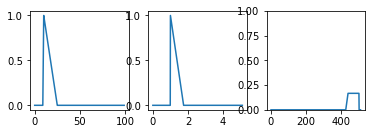

In [51]:
plt.subplot(2,3,1)
plt.plot(temp,L)
plt.subplot(2,3,2)
plt.plot(temp1,L1)
plt.subplot(2,3,3)
plt.ylim(0,1)
plt.plot(t2)

### Aggregated Output

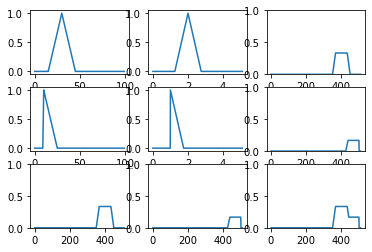

In [52]:
plt.subplot(3,3,1)
plt.plot(temp,BA)
plt.subplot(3,3,2)
plt.plot(temp1,BA1)
plt.subplot(3,3,3)
plt.ylim(0,1)
plt.plot(t1)

plt.subplot(3,3,4)
plt.plot(temp,L)
plt.subplot(3,3,5)
plt.plot(temp1,L1)
plt.subplot(3,3,6)
plt.ylim(0,1)
plt.plot(t2)

plt.subplot(3,3,7)
plt.ylim(0,1)
plt.plot(t1)
plt.subplot(3,3,8)
plt.ylim(0,1)
plt.plot(t2)
plt.subplot(3,3,9)
t3=np.fmax(t1,t2)
plt.ylim(0,1)
plt.plot(t3)

### Defuzzification

In [65]:
import skfuzzy as fuzz
mfx = temp2
defuzz_centroid = fuzz.defuzz(mfx, t3, 'centroid')
print("Centroid is at : {}".format(defuzz_centroid))

Centroid is at : 4.180619916862451


(-0.1, 1.1)

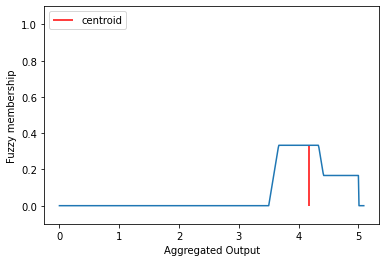

In [66]:
ymax = [fuzz.interp_membership(mfx,t3,i) for i in [defuzz_centroid]]
plt.plot(mfx,t3)
plt.vlines(defuzz_centroid, 0 , ymax,label = 'centroid', color='r')
plt.legend(loc=2)
plt.ylabel('Fuzzy membership')
plt.xlabel('Aggregated Output')
plt.ylim(-0.1,1.1)

In [57]:
np.shape(mfx)

(44,)

In [67]:
defuzz_centroid

4.180619916862451